# ⚙️ Implementasi Dasbor Cuaca Global dengan Python Requests dan Matplotlib

Berikut adalah skrip Python yang membangun dasbor cuaca interaktif:

* **Mengimpor Library:** Menggunakan `requests` untuk berinteraksi dengan OpenWeatherMap API dan `matplotlib.pyplot` untuk visualisasi.
* **Konstanta `API_KEY` dan `BASE_URL`:** Menyimpan kunci API OpenWeatherMap dan URL dasar API. **Pastikan untuk mengganti `"YOUR_API_KEY"` dengan API key kamu yang sebenarnya.**
* **Fungsi `fetch_weather_data(city)`:** Mengirim permintaan ke OpenWeatherMap API untuk mendapatkan data cuaca kota yang diberikan. Mengembalikan data JSON jika berhasil, atau `None` jika terjadi error.
* **Fungsi `display_weather_data(data)`:** Menerima data cuaca JSON dan mencetak informasi yang relevan seperti nama kota, suhu, kondisi cuaca, kelembaban, dan kecepatan angin.
* **Fungsi `plot_weather_trend(days, temperatures)`:** Membuat dan menampilkan plot garis tren suhu (saat ini tidak digunakan dalam menu utama).
* **Fungsi `compare_weather(cities)`:** Menerima daftar nama kota, mengambil data suhu untuk setiap kota, dan membuat grafik batang perbandingan suhu menggunakan `matplotlib.pyplot`.
* **Fungsi `main()`:** Menampilkan menu interaktif kepada pengguna untuk memilih antara melihat cuaca satu kota, membandingkan cuaca beberapa kota, atau keluar dari program.

**Catatan:** Program ini memerlukan koneksi internet dan API key OpenWeatherMap yang valid untuk berfungsi.

Jelajahi cuaca dunia melalui kode!

Welcome to the Global Weather Dashboard!

Menu:
1. View Weather for a City
2. Compare Weather for Multiple Cities
3. Exit


Choose an option:  1
Enter the city name:  London


City: London
Temperature: 8.89°C
Weather: Overcast Clouds
Humidity: 81%
Wind Speed: 2.06 m/s

Menu:
1. View Weather for a City
2. Compare Weather for Multiple Cities
3. Exit


Choose an option:  2
Enter city names separated by commas:  London, Tokyo


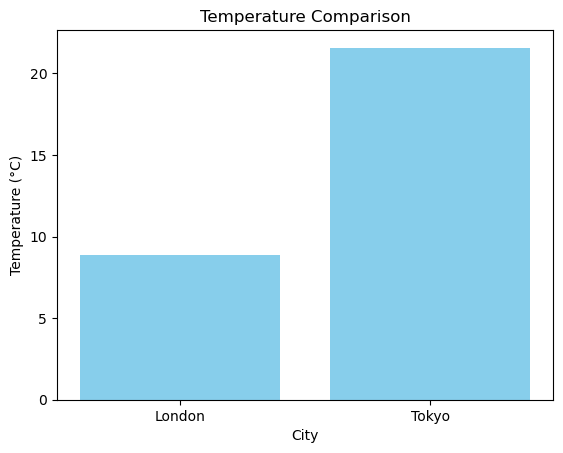


Menu:
1. View Weather for a City
2. Compare Weather for Multiple Cities
3. Exit


Choose an option:  3


Goodbye!


In [1]:
import requests
import matplotlib.pyplot as plt

API_KEY = "edf2e4659d181acefd7bc4bcd7412597"
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

def fetch_weather_data(city):
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code)
        return None

def display_weather_data(data):
    print(f"City: {data['name']}")
    print(f"Temperature: {data['main']['temp']}°C")
    print(f"Weather: {data['weather'][0]['description'].title()}")
    print(f"Humidity: {data['main']['humidity']}%")
    print(f"Wind Speed: {data['wind']['speed']} m/s")

def plot_weather_trend(days, temperatures):
    plt.plot(days, temperatures, marker='o', color='blue')
    plt.title("Temperature Trend")
    plt.xlabel("Days")
    plt.ylabel("Temperature (°C)")
    plt.grid()
    plt.show()

def compare_weather(cities):
    temps = []
    for city in cities:
        data = fetch_weather_data(city)
        if data:
            temps.append((city, data['main']['temp']))

    city_names = [t[0] for t in temps]
    city_temps = [t[1] for t in temps]
    plt.bar(city_names, city_temps, color='skyblue')
    plt.title("Temperature Comparison")
    plt.xlabel("City")
    plt.ylabel("Temperature (°C)")
    plt.show()

def main():
    print("Welcome to the Global Weather Dashboard!")
    while True:
        print("\nMenu:")
        print("1. View Weather for a City")
        print("2. Compare Weather for Multiple Cities")
        print("3. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            city = input("Enter the city name: ")
            weather_data = fetch_weather_data(city)
            if weather_data:
                display_weather_data(weather_data)
        elif choice == "2":
            cities = input("Enter city names separated by commas: ").split(",")
            compare_weather([city.strip() for city in cities])
        elif choice == "3":
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()